In [6]:
import pandas as pd

# Load all datasets
df1 = pd.read_csv("C:/Users/Nidhi/Downloads/money_expnses/11 march 2025.csv")
df2 = pd.read_csv("C:/Users/Nidhi/Downloads/money_expnses/budget_data.csv")
df3 = pd.read_csv("C:/Users/Nidhi/Downloads/money_expnses/budjet (2).csv")

# Show first few rows of each
print("Dataset 1:")
display(df1.head())

print("\nDataset 2:")
display(df2.head())

print("\nDataset 3:")
display(df3.head())


Dataset 1:


,date,category,amount
0,2022-07-06 05:57:10 +0000,Restuarant,5.50
1,2022-07-06 05:57:27 +0000,Market,2.00
2,2022-07-06 05:58:12 +0000,Coffe,30.10
3,2022-07-06 05:58:25 +0000,Market,17.33
4,2022-07-06 05:59:00 +0000,Restuarant,5.50



Dataset 2:


,date,category,amount
0,2022-07-06 05:57:10 +0000,Restuarant,5.50
1,2022-07-06 05:57:27 +0000,Market,2.00
2,2022-07-06 05:58:12 +0000,Coffe,30.10
3,2022-07-06 05:58:25 +0000,Market,17.33
4,2022-07-06 05:59:00 +0000,Restuarant,5.50



Dataset 3:


,date,category,amount
0,2022-07-06 05:57:10 +0000,Restuarant,5.50
1,2022-07-06 05:57:27 +0000,Market,2.00
2,2022-07-06 05:58:12 +0000,Coffe,30.10
3,2022-07-06 05:58:25 +0000,Market,17.33
4,2022-07-06 05:59:00 +0000,Restuarant,5.50


In [7]:
# Use any one of the datasets (they appear identical)
df = df2.copy()

# Clean and standardize
df['date'] = pd.to_datetime(df['date'])
df['category'] = df['category'].str.strip().str.title()
df['category'] = df['category'].replace({'Restuarant': 'Restaurant', 'Coffe': 'Coffee'})
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')

# Extract month
df['date'] = df['date'].dt.tz_localize(None)
df['month'] = df['date'].dt.to_period('M')

df.head()


,date,category,amount,month
0,2022-07-06 05:57:10,Restaurant,5.50,2022-07
1,2022-07-06 05:57:27,Market,2.00,2022-07
2,2022-07-06 05:58:12,Coffee,30.10,2022-07
3,2022-07-06 05:58:25,Market,17.33,2022-07
4,2022-07-06 05:59:00,Restaurant,5.50,2022-07


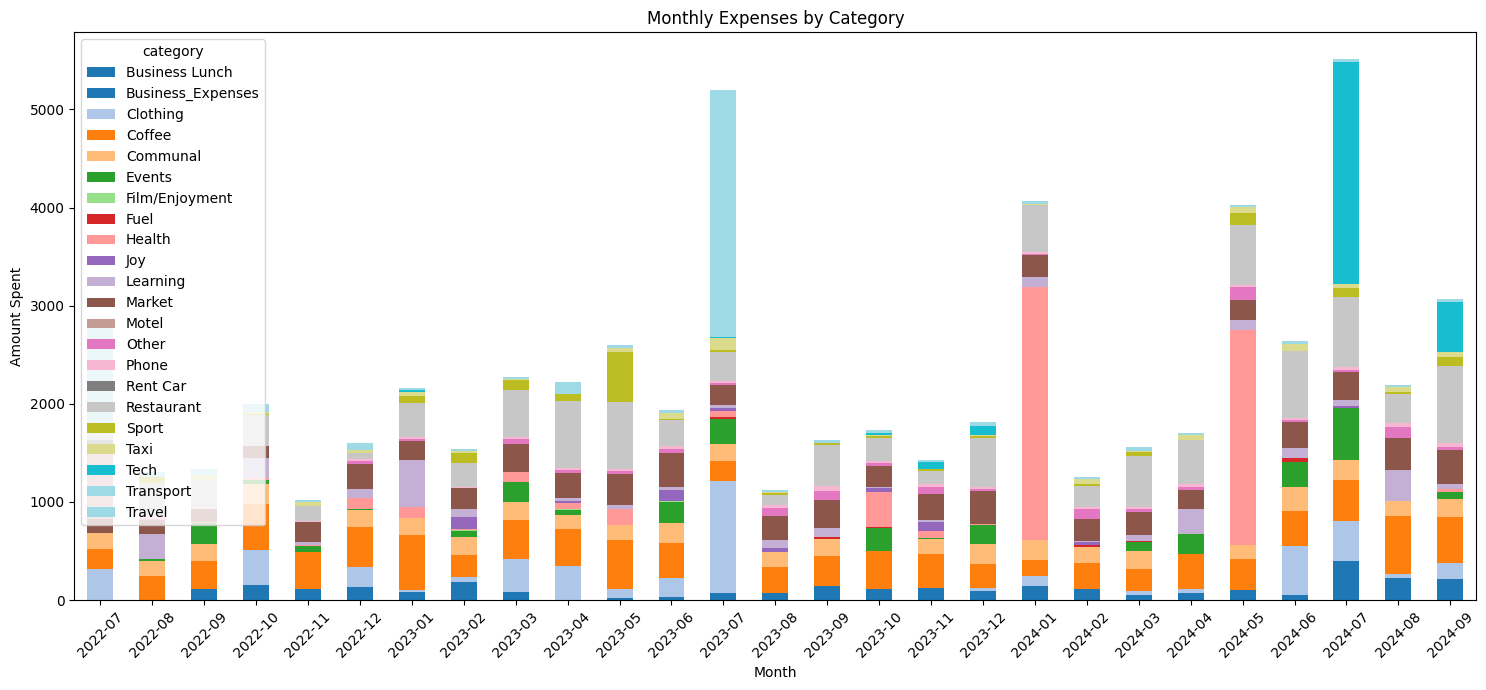

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by month and category
monthly_expense = df.groupby(['month', 'category'])['amount'].sum().unstack().fillna(0)

# Plot
monthly_expense.plot(kind='bar', stacked=True, figsize=(15, 7), colormap='tab20')
plt.title('Monthly Expenses by Category')
plt.xlabel('Month')
plt.ylabel('Amount Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Enter your monthly income (e.g., 2000):  3500


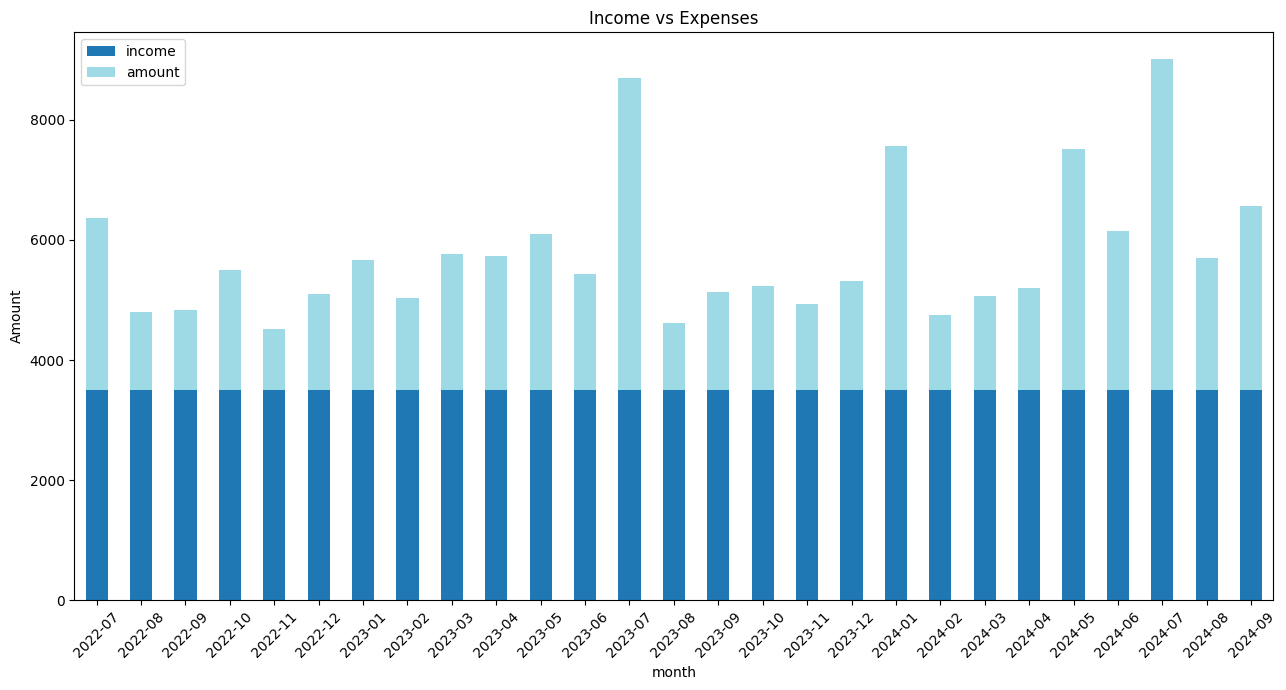

In [38]:
# 📥 Ask user for monthly income
user_income = float(input("Enter your monthly income (e.g., 2000): "))

# 🧮 Aggregate monthly expenses
monthly_total = df.groupby('month')['amount'].sum().reset_index()
monthly_total['income'] = user_income
monthly_total['savings'] = monthly_total['income'] - monthly_total['amount']

# 📊 Plot Income vs Expenses
monthly_total.set_index('month')[['income', 'amount']].plot(
    kind='bar',
    stacked=True,
    figsize=(13, 7),
    colormap='tab20'
)
plt.title('Income vs Expenses')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [37]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Add numeric month index
monthly_total['month_num'] = range(len(monthly_total))
X = monthly_total[['month_num']]
y = monthly_total['amount']

# Train model
model = LinearRegression()
model.fit(X, y)

# Predict next month
next_month = len(monthly_total)
predicted = model.predict(pd.DataFrame({'month_num': [next_month]}))
print(f"📈 Predicted expense for next month: Rs. {predicted[0]:.2f}")


📈 Predicted expense for next month: Rs. 3035.63


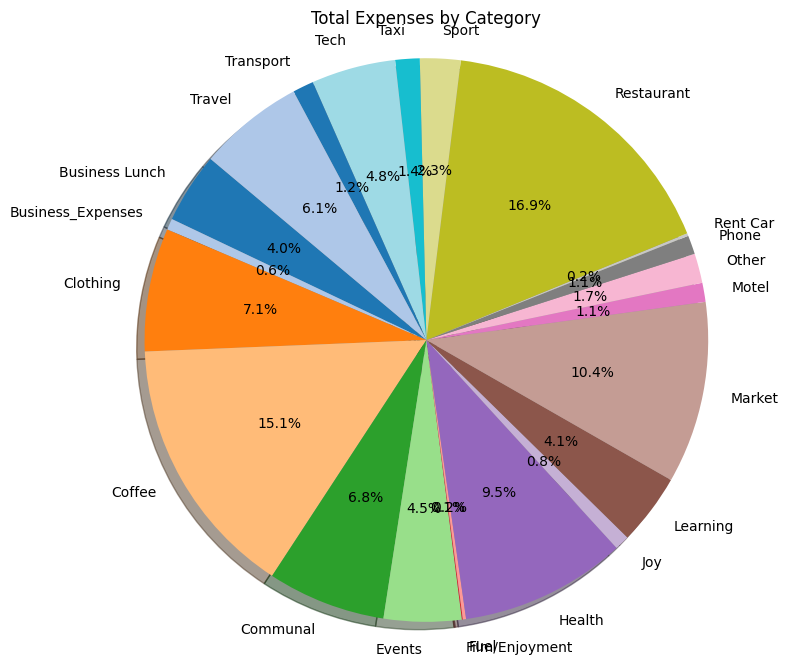

In [42]:
import matplotlib.pyplot as plt

# Group by category and sum amounts
category_expense = df.groupby('category')['amount'].sum()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    category_expense,
    labels=category_expense.index,
    autopct='%1.1f%%',
    startangle=140,
    shadow=True,
    colors=plt.cm.tab20.colors
)
plt.title('Total Expenses by Category')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()
